In [85]:
import pandas as pd

df = pd.read_csv('BTC-USD_17.09.2014-25.10.2023.csv')

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [86]:
from datetime import datetime

def prompt_for_date(prompt_message, min_date=None, max_date=None, comparison_date=None, must_be_after=False):
    while True:
        date_input = input(prompt_message)
        try:
            date = datetime.strptime(date_input, "%d-%m-%Y")
            if min_date is not None and date < min_date:
                print("The date must not be before %s." % min_date.strftime("%d-%m-%Y"))
                continue
            if max_date is not None and date > max_date:
                print("The date must not be after %s." % max_date.strftime("%d-%m-%Y"))
                continue
            if comparison_date is not None:
                if must_be_after and date <= comparison_date:
                    print("The end date must be after the start date %s." % comparison_date.strftime("%d-%m-%Y"))
                    continue
            return date
        except ValueError:
            print("Invalid date format. Please use the format dd-mm-yyyy.")

min_allowed_start_date = datetime.strptime("17-09-2014", "%d-%m-%Y")
max_allowed_end_date = datetime.strptime("25-10-2023", "%d-%m-%Y")

start_date = prompt_for_date("Enter the start date (dd-mm-yyyy).", min_date=min_allowed_start_date)
end_date = prompt_for_date("Enter the end date (dd-mm-yyyy).", max_date=max_allowed_end_date, comparison_date=start_date, must_be_after=True)

def prompt_for_number(prompt_message, minimum=None, condition=lambda x: True):
    while True:
        try:
            number = float(input(prompt_message))
            if minimum is not None and number <= minimum:
                print("The value must be greater than %s." % minimum)
                continue
            if not condition(number):
                print("The input does not meet the required condition.")
                continue
            return number
        except ValueError:
            print("Please enter a valid number.")

initial_balance = prompt_for_number("Enter the initial balance of the trading bot wallet: ", minimum=0)
profit_percent = prompt_for_number("Enter the % profit (value must be >= 1): ", minimum=1.00) 
balance = initial_balance

start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

ema_start_date = start_date - pd.Timedelta(days=200)
ema_end_date = end_date - pd.Timedelta(days=200)
initial_ema_start_date = start_date - pd.Timedelta(days=200)

start_date_df_ascending_6month = pd.to_datetime('2020-10-01')
end_date_df_ascending_6month  = pd.to_datetime('2021-04-01')
start_date_df_descending_6month = pd.to_datetime('2021-10-01')
end_date_df_descending_6month  = pd.to_datetime('2022-09-01')
start_date_df_stagnation_6month = pd.to_datetime('2015-11-01')
end_date_df_stagnation_6month  = pd.to_datetime('2016-04-01')
start_date_df_combined_1year = pd.to_datetime('2021-10-01')
end_date_df_combined_1year  = pd.to_datetime('2022-10-01')


In [87]:
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
filtered_df_ascending_6month = df[(df['Date'] >= start_date_df_ascending_6month) & (df['Date'] <= end_date_df_ascending_6month)]
filtered_df_descending_6month = df[(df['Date'] >= start_date_df_descending_6month) & (df['Date'] <= end_date_df_descending_6month)]
filtered_df_stagnation_6month = df[(df['Date'] >= start_date_df_stagnation_6month) & (df['Date'] <= end_date_df_stagnation_6month)]
filtered_df_combined_1year = df[(df['Date'] >= start_date_df_combined_1year) & (df['Date'] <= end_date_df_combined_1year)]

filtered_df.rename(columns={'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low','Close': 'close', 'Volume': 'volume'}, inplace=True)
filtered_df.insert(1, 'time', '00:00')
filtered_df['date'] = filtered_df['date'].dt.strftime('%m/%d/%Y')
filtered_df['date'] = pd.to_datetime(filtered_df['date'])
filtered_df.drop(columns=['Adj Close'], inplace=True)

filtered_df_ascending_6month.rename(columns={'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low','Close': 'close', 'Volume': 'volume'}, inplace=True)
filtered_df_ascending_6month.insert(1, 'time', '00:00')
filtered_df_ascending_6month['date'] = filtered_df_ascending_6month['date'].dt.strftime('%m/%d/%Y')
filtered_df_ascending_6month['date'] = pd.to_datetime(filtered_df_ascending_6month['date'])
filtered_df_ascending_6month.drop(columns=['Adj Close'], inplace=True)

filtered_df_descending_6month.rename(columns={'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low','Close': 'close', 'Volume': 'volume'}, inplace=True)
filtered_df_descending_6month.insert(1, 'time', '00:00')
filtered_df_descending_6month['date'] = filtered_df_descending_6month['date'].dt.strftime('%m/%d/%Y')
filtered_df_descending_6month['date'] = pd.to_datetime(filtered_df_descending_6month['date'])
filtered_df_descending_6month.drop(columns=['Adj Close'], inplace=True)

filtered_df_stagnation_6month.rename(columns={'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low','Close': 'close', 'Volume': 'volume'}, inplace=True)
filtered_df_stagnation_6month.insert(1, 'time', '00:00')
filtered_df_stagnation_6month['date'] = filtered_df_stagnation_6month['date'].dt.strftime('%m/%d/%Y')
filtered_df_stagnation_6month['date'] = pd.to_datetime(filtered_df_stagnation_6month['date'])
filtered_df_stagnation_6month.drop(columns=['Adj Close'], inplace=True)

filtered_df_combined_1year.rename(columns={'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low','Close': 'close', 'Volume': 'volume'}, inplace=True)
filtered_df_combined_1year.insert(1, 'time', '00:00')
filtered_df_combined_1year['date'] = filtered_df_combined_1year['date'].dt.strftime('%m/%d/%Y')
filtered_df_combined_1year['date'] = pd.to_datetime(filtered_df_combined_1year['date'])
filtered_df_combined_1year.drop(columns=['Adj Close'], inplace=True)

C:\Users\Pako\AppData\Local\Temp\ipykernel_17144\293566289.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_ascending_6month.rename(columns={'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low','Close': 'close', 'Volume': 'volume'}, inplace=True)
C:\Users\Pako\AppData\Local\Temp\ipykernel_17144\293566289.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_ascending_6month['date'] = filtered_df_ascending_6month['date'].dt.strftime('%m/%d/%Y')
C:\Users\Pako\AppData\Local\Temp\ipykernel_17144\293566289.py:16: SettingWithCopyWarni

In [88]:
import time

def trading_bot_1(balance, data, fee_percent, profit_percent):
    trades = []
    holding = 0
    last_buy_balance = 0

    for index, row in data.iterrows():
        date = row['date']
        unix_date = int(time.mktime(date.timetuple()))
        open_price, high_price, low_price, close_price = row['open'], row['high'], row['low'], row['close']

        if holding == 0:
            buy_price = open_price
            fee = fee_percent * balance / 100
            real_balance = balance - fee
            last_buy_balance = real_balance
            holding = real_balance / buy_price
            trades.append([unix_date, date, 'BUY', buy_price, open_price, high_price, low_price, close_price, real_balance])
        if holding > 0:
            sell_value = holding * close_price
            profit = (sell_value - last_buy_balance) / last_buy_balance * 100

            if profit >= profit_percent:
                fee = fee_percent * sell_value / 100
                balance = sell_value - fee
                holding = 0
                last_buy_balance =  sell_value
                trades.append([unix_date, date, 'SELL', close_price, open_price, high_price, low_price, close_price, real_balance])
                
    final_balance = trades[-1][-1]
    return final_balance, trades


In [89]:
print(f"Initial Balance: ${initial_balance}")

final_balance, trades = trading_bot_1(initial_balance, filtered_df, 1, profit_percent)
print(f"Final Balance Custom Data: ${final_balance}")
trades_df = pd.DataFrame(trades, columns=['unix', 'date', 'trade', 'price', 'open', 'high', 'low', 'close', 'balance'])
trades_df['date'] = pd.to_datetime(trades_df['date'])
trades_df['date'] = trades_df['date'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
df = trades_df

final_balance_tb1, trades_asc = trading_bot_1(initial_balance, filtered_df_ascending_6month, 1, profit_percent)
print(f"Final Balance ASC_6M: ${final_balance_tb1}")
trades_df = pd.DataFrame(trades_asc, columns=['unix', 'date', 'trade', 'price', 'open', 'high', 'low', 'close', 'balance'])
trades_df['date'] = pd.to_datetime(trades_df['date'])
trades_df['date'] = trades_df['date'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
trades_df.to_csv('btcusd_trend_tb2_trades.csv', index=False)
df_asc = trades_df

final_balance_tb2, trades_dsc = trading_bot_1(initial_balance, filtered_df_descending_6month, 1, profit_percent)
print(f"Final Balance DSC_6M: ${final_balance_tb2}")
trades_df = pd.DataFrame(trades_dsc, columns=['unix', 'date', 'trade', 'price', 'open', 'high', 'low', 'close', 'balance'])
trades_df['date'] = pd.to_datetime(trades_df['date'])
trades_df['date'] = trades_df['date'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
trades_df.to_csv('btcusd_trend_tb2_dsc_trades.csv', index=False)
df_dsc = trades_df

final_balance_tb3, trades_stg = trading_bot_1(initial_balance, filtered_df_stagnation_6month, 1, profit_percent)
print(f"Final Balance STG_6M: ${final_balance_tb3}")
trades_df = pd.DataFrame(trades_stg, columns=['unix', 'date', 'trade', 'price', 'open', 'high', 'low', 'close', 'balance'])
trades_df['date'] = pd.to_datetime(trades_df['date'])
trades_df['date'] = trades_df['date'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
df_stg = trades_df

final_balance_tb4, trades_com = trading_bot_1(initial_balance, filtered_df_combined_1year, 1, profit_percent)
print(f"Final Balance COM_1Y: ${final_balance_tb4}")
trades_df = pd.DataFrame(trades_com, columns=['unix', 'date', 'trade', 'price', 'open', 'high', 'low', 'close', 'balance'])
trades_df['date'] = pd.to_datetime(trades_df['date'])
trades_df['date'] = trades_df['date'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
df_com = trades_df

Initial Balance: $100.0
Final Balance Custom Data: $1546.891869119686
Final Balance ASC_6M: $237.22507038366194
Final Balance DSC_6M: $127.11683929138928
Final Balance STG_6M: $127.84426594200919
Final Balance COM_1Y: $127.11683929138928


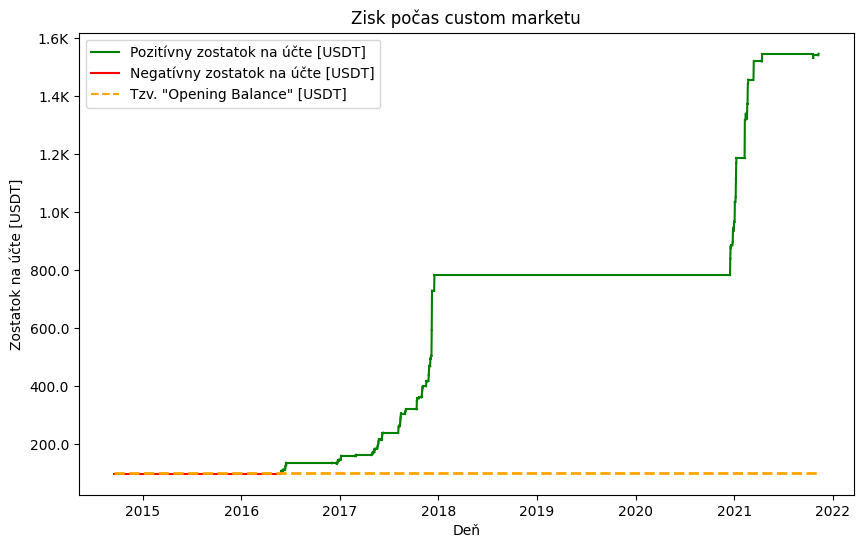

In [90]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter

def format_yaxis(value, pos):
    if value >= 1e9:
        val_str = '{:1.1f}B'.format(value * 1e-9)
    elif value >= 1e6:
        val_str = '{:1.1f}M'.format(value * 1e-6)
    elif value >= 1e3:
        val_str = '{:1.1f}K'.format(value * 1e-3)
    else:
        val_str = str(value)
    return val_str

plt.figure(figsize=(10, 6))
for i in range(1, len(df['date'])):
    if df['balance'][i-1] >= initial_balance and df['balance'][i] >= initial_balance:
        plt.plot([pd.to_datetime(df['date'][i-1]), pd.to_datetime(df['date'][i])],
                 [df['balance'][i-1], df['balance'][i]], color='green')
    else:
        plt.plot([pd.to_datetime(df['date'][i-1]), pd.to_datetime(df['date'][i])],
                 [df['balance'][i-1], df['balance'][i]], color='red')

plt.plot([pd.to_datetime(df['date'][0]), pd.to_datetime(df['date'][len(df['date'])-1])], [initial_balance, initial_balance], color='orange', linestyle='dashed', linewidth=2, label='Zostatok na účte [USDT]')

legend_elements = [Line2D([0], [0], color='green', label='Pozitívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='red', label='Negatívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='orange', linestyle='dashed', label='Tzv. "Opening Balance" [USDT]')]

plt.legend(handles=legend_elements)
plt.title('Zisk počas custom marketu')
plt.xlabel('Deň')
plt.ylabel('Zostatok na účte [USDT]')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_yaxis))
plt.show()

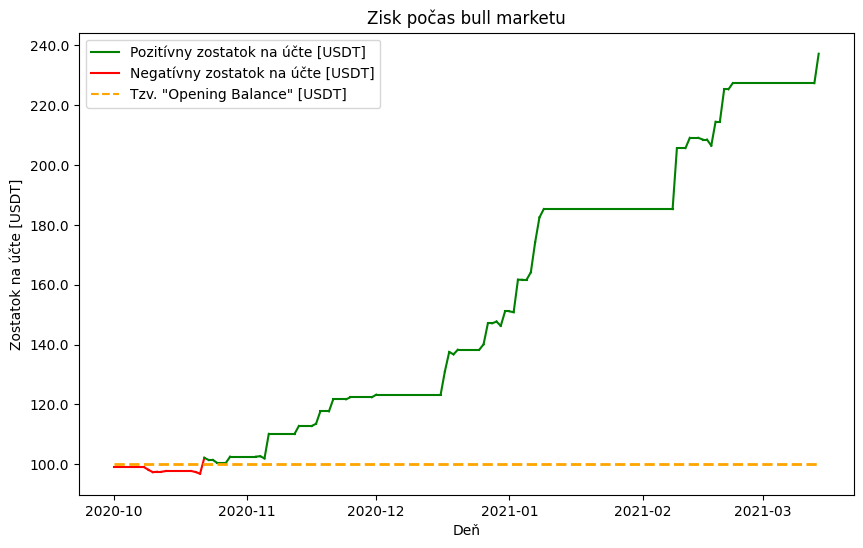

In [91]:
plt.figure(figsize=(10, 6))
for i in range(1, len(df_asc['date'])):
    if df_asc['balance'][i-1] >= initial_balance and df_asc['balance'][i] >= initial_balance:
        plt.plot([pd.to_datetime(df_asc['date'][i-1]), pd.to_datetime(df_asc['date'][i])],
                 [df_asc['balance'][i-1], df_asc['balance'][i]], color='green')
    else:
        plt.plot([pd.to_datetime(df_asc['date'][i-1]), pd.to_datetime(df_asc['date'][i])],
                 [df_asc['balance'][i-1], df_asc['balance'][i]], color='red')

plt.plot([pd.to_datetime(df_asc['date'][0]), pd.to_datetime(df_asc['date'][len(df_asc['date'])-1])], [initial_balance, initial_balance], color='orange', linestyle='dashed', linewidth=2, label='Zostatok na účte [USDT]')

legend_elements = [Line2D([0], [0], color='green', label='Pozitívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='red', label='Negatívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='orange', linestyle='dashed', label='Tzv. "Opening Balance" [USDT]')]

plt.legend(handles=legend_elements)
plt.title('Zisk počas bull marketu')
plt.xlabel('Deň')
plt.ylabel('Zostatok na účte [USDT]')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_yaxis))
plt.show()

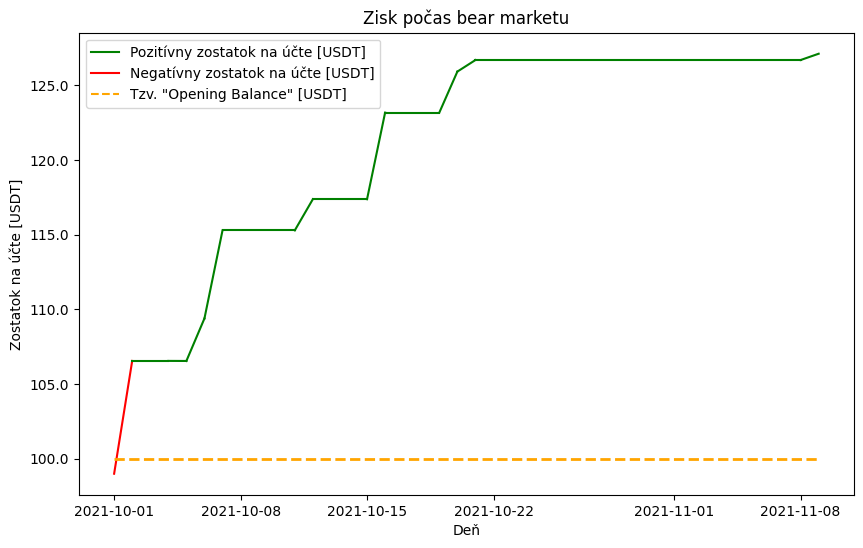

In [92]:
plt.figure(figsize=(10, 6))
for i in range(1, len(df_dsc['date'])):
    if df_dsc['balance'][i-1] >= initial_balance and df_dsc['balance'][i] >= initial_balance:
        plt.plot([pd.to_datetime(df_dsc['date'][i-1]), pd.to_datetime(df_dsc['date'][i])],
                 [df_dsc['balance'][i-1], df_dsc['balance'][i]], color='green')
    else:
        plt.plot([pd.to_datetime(df_dsc['date'][i-1]), pd.to_datetime(df_dsc['date'][i])],
                 [df_dsc['balance'][i-1], df_dsc['balance'][i]], color='red')

plt.plot([pd.to_datetime(df_dsc['date'][0]), pd.to_datetime(df_dsc['date'][len(df_dsc['date'])-1])], [initial_balance, initial_balance], color='orange', linestyle='dashed', linewidth=2, label='Zostatok na účte [USDT]')

legend_elements = [Line2D([0], [0], color='green', label='Pozitívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='red', label='Negatívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='orange', linestyle='dashed', label='Tzv. "Opening Balance" [USDT]')]

plt.legend(handles=legend_elements)
plt.title('Zisk počas bear marketu')
plt.xlabel('Deň')
plt.ylabel('Zostatok na účte [USDT]')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_yaxis))
plt.show()

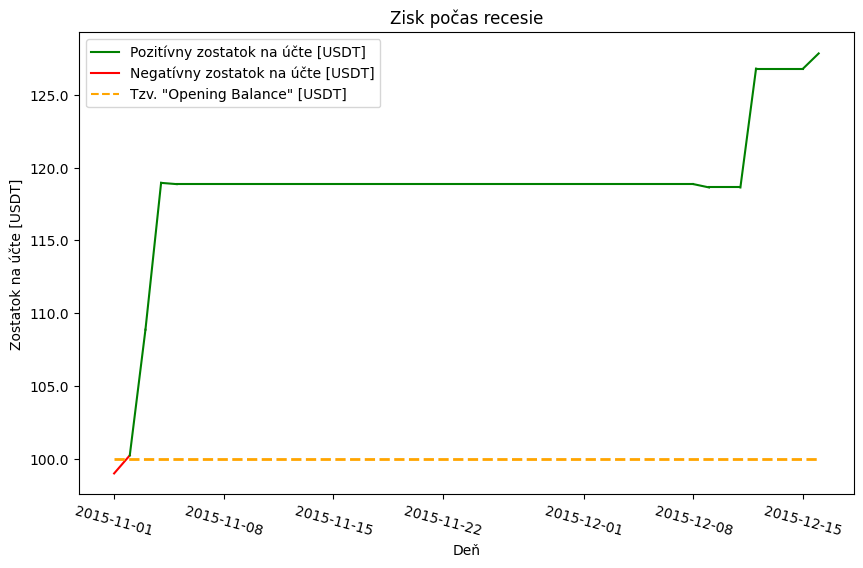

In [93]:
plt.figure(figsize=(10, 6))
for i in range(1, len(df_stg['date'])):
    if df_stg['balance'][i-1] >= initial_balance and df_stg['balance'][i] >= initial_balance:
        plt.plot([pd.to_datetime(df_stg['date'][i-1]), pd.to_datetime(df_stg['date'][i])],
                 [df_stg['balance'][i-1], df_stg['balance'][i]], color='green')
    else:
        plt.plot([pd.to_datetime(df_stg['date'][i-1]), pd.to_datetime(df_stg['date'][i])],
                 [df_stg['balance'][i-1], df_stg['balance'][i]], color='red')

plt.plot([pd.to_datetime(df_stg['date'][0]), pd.to_datetime(df_stg['date'][len(df_stg['date'])-1])], [initial_balance, initial_balance], color='orange', linestyle='dashed', linewidth=2, label='Zostatok na účte [USDT]')
plt.xticks(rotation = -15)

legend_elements = [Line2D([0], [0], color='green', label='Pozitívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='red', label='Negatívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='orange', linestyle='dashed', label='Tzv. "Opening Balance" [USDT]')]

plt.legend(handles=legend_elements)
plt.title('Zisk počas recesie')
plt.xlabel('Deň')
plt.ylabel('Zostatok na účte [USDT]')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_yaxis))
plt.show()

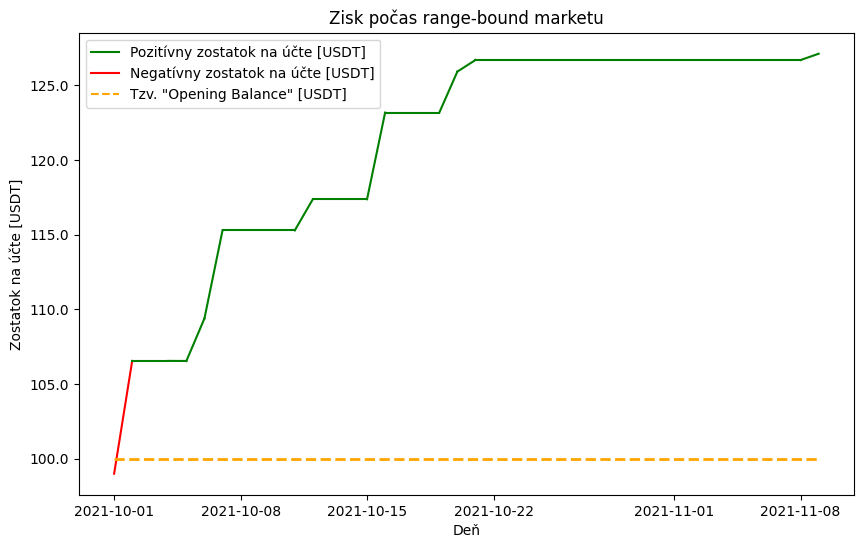

In [94]:
plt.figure(figsize=(10, 6))
for i in range(1, len(df_com['date'])):
    if df_com['balance'][i-1] >= initial_balance and df_com['balance'][i] >= initial_balance:
        plt.plot([pd.to_datetime(df_com['date'][i-1]), pd.to_datetime(df_com['date'][i])],
                 [df_com['balance'][i-1], df_com['balance'][i]], color='green')
    else:
        plt.plot([pd.to_datetime(df_com['date'][i-1]), pd.to_datetime(df_com['date'][i])],
                 [df_com['balance'][i-1], df_com['balance'][i]], color='red')

plt.plot([pd.to_datetime(df_com['date'][0]), pd.to_datetime(df_com['date'][len(df_com['date'])-1])], [initial_balance, initial_balance], color='orange', linestyle='dashed', linewidth=2, label='Zostatok na účte [USDT]')

legend_elements = [Line2D([0], [0], color='green', label='Pozitívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='red', label='Negatívny zostatok na účte [USDT]'),
                   Line2D([0], [0], color='orange', linestyle='dashed', label='Tzv. "Opening Balance" [USDT]')]

plt.legend(handles=legend_elements)
plt.title('Zisk počas range-bound marketu')
plt.xlabel('Deň')
plt.ylabel('Zostatok na účte [USDT]')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_yaxis))
plt.show()

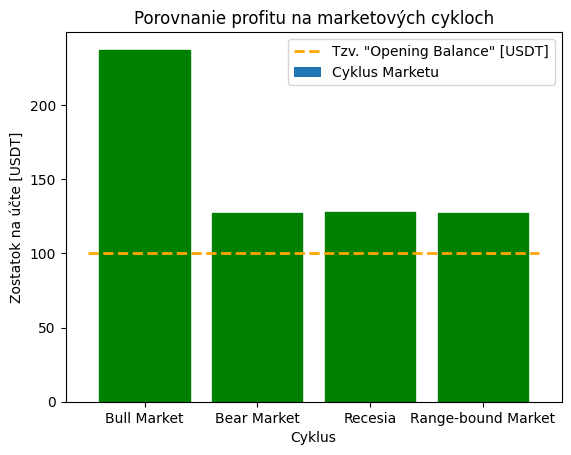

In [95]:
x_pos = ['Bull Market', 'Bear Market', 'Recesia', 'Range-bound Market']
y_pos = [final_balance_tb1, final_balance_tb2, final_balance_tb3, final_balance_tb4]

bars = plt.bar(x_pos,y_pos)
plt.plot([-0.5, len(x_pos)-0.5], [initial_balance, initial_balance], color='orange', linestyle='dashed', linewidth=2)
plt.legend(['Tzv. "Opening Balance" [USDT]', 'Cyklus Marketu'])
plt.title('Porovnanie profitu na marketových cykloch')
plt.xlabel('Cyklus')
plt.ylabel('Zostatok na účte [USDT]')

for i in range(len(bars)):
    if initial_balance > y_pos[i]:
        bars[i].set_color('red')
    else:
        bars[i].set_color('green')

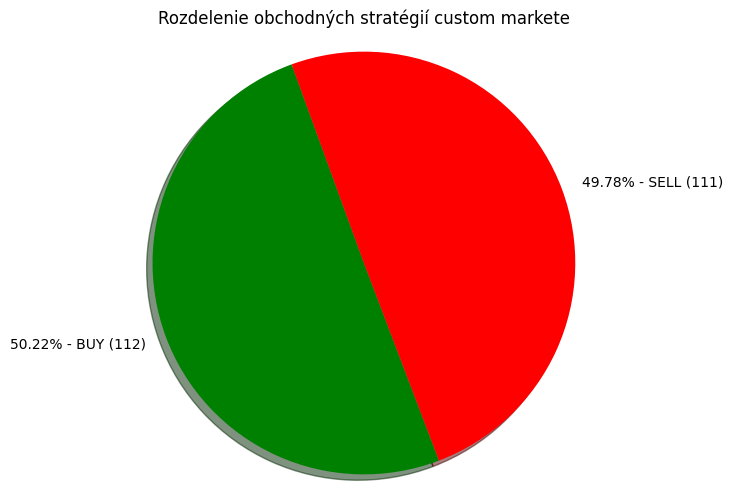

In [96]:
mode_counts = df['trade'].value_counts()
color_map = {'BUY': 'green', 'SELL': 'red'}
colors_ordered = [color_map[mode] for mode in mode_counts.index]
labels = [f"{count / len(df) * 100:.2f}% - {mode} ({count})" for mode, count in zip(mode_counts.index, mode_counts)]
plt.figure(figsize=(6, 6))
plt.pie(mode_counts, labels=labels, autopct='', colors=colors_ordered,shadow=True, startangle=110)
plt.title('Rozdelenie obchodných stratégií custom markete')
plt.axis('equal')

plt.show()

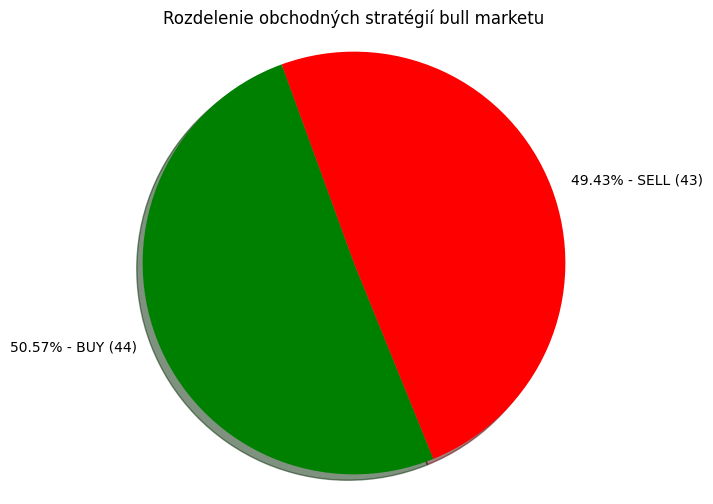

In [97]:
mode_counts = df_asc['trade'].value_counts()
color_map = {'BUY': 'green', 'SELL': 'red'}
colors_ordered = [color_map[mode] for mode in mode_counts.index]
labels = [f"{count / len(df_asc) * 100:.2f}% - {mode} ({count})" for mode, count in zip(mode_counts.index, mode_counts)]
plt.figure(figsize=(6, 6))
plt.pie(mode_counts, labels=labels, autopct='', colors=colors_ordered,shadow=True, startangle=110)
plt.title('Rozdelenie obchodných stratégií bull marketu')
plt.axis('equal')

plt.show()

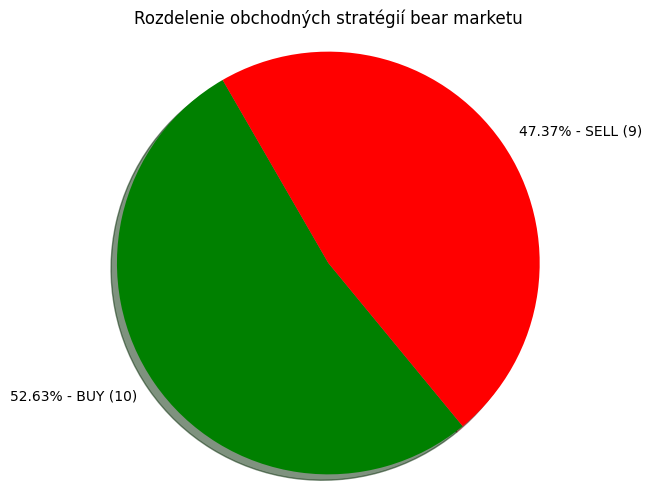

In [98]:
mode_counts = df_dsc['trade'].value_counts()
color_map = {'BUY': 'green', 'SELL': 'red'}
colors_ordered = [color_map[mode] for mode in mode_counts.index]
labels = [f"{count / len(df_dsc) * 100:.2f}% - {mode} ({count})" for mode, count in zip(mode_counts.index, mode_counts)]
plt.figure(figsize=(6, 6))
plt.pie(mode_counts, labels=labels, autopct='', colors=colors_ordered, shadow=True, startangle=120)
plt.title('Rozdelenie obchodných stratégií bear marketu')
plt.axis('equal')

plt.show()

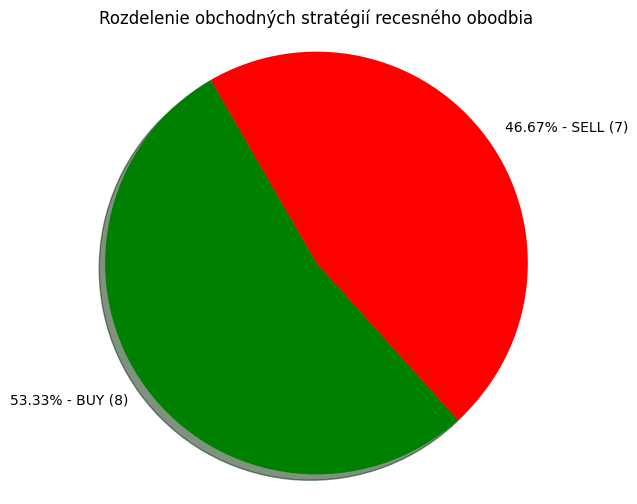

In [99]:
mode_counts = df_stg['trade'].value_counts()
color_map = {'BUY': 'green', 'SELL': 'red'}
colors_ordered = [color_map[mode] for mode in mode_counts.index]
labels = [f"{count / len(df_stg) * 100:.2f}% - {mode} ({count})" for mode, count in zip(mode_counts.index, mode_counts)]
plt.figure(figsize=(6, 6))
plt.pie(mode_counts, labels=labels, autopct='', colors=colors_ordered, shadow=True, startangle=120)
plt.title('Rozdelenie obchodných stratégií recesného obodbia')
plt.axis('equal')

plt.show()

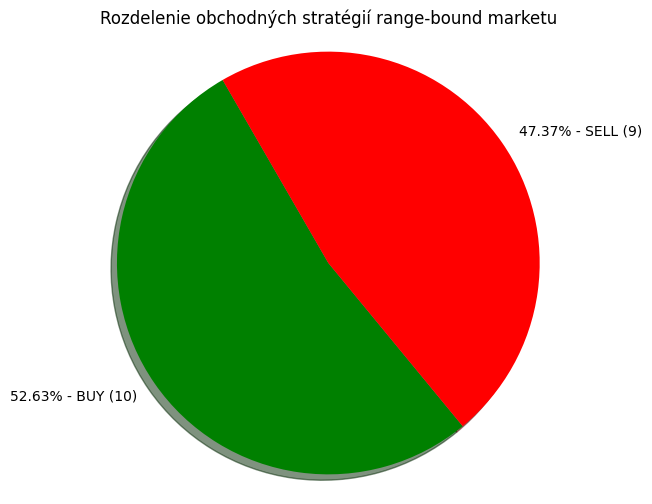

In [100]:
mode_counts = df_com['trade'].value_counts()
color_map = {'BUY': 'green', 'SELL': 'red'}
colors_ordered = [color_map[mode] for mode in mode_counts.index]
labels = [f"{count / len(df_com) * 100:.2f}% - {mode} ({count})" for mode, count in zip(mode_counts.index, mode_counts)]
plt.figure(figsize=(6, 6))
plt.pie(mode_counts, labels=labels, autopct='', colors=colors_ordered, shadow=True, startangle=120)
plt.title('Rozdelenie obchodných stratégií range-bound marketu')
plt.axis('equal')

plt.show()

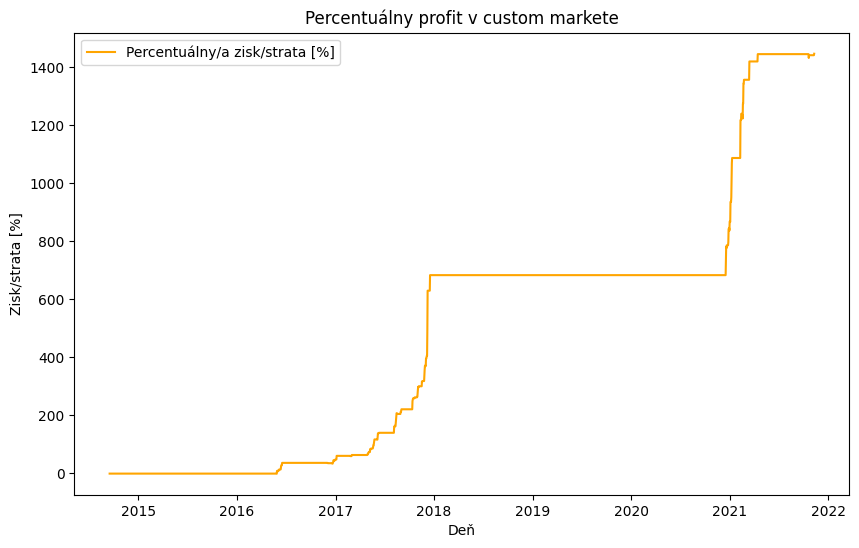

In [101]:
df['profit_percentage'] = ((df['balance'] - initial_balance) / initial_balance) * 100
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df['date']), df['profit_percentage'], color='orange')
plt.legend(['Percentuálny/a zisk/strata [%]'])
plt.xlabel('Deň')
plt.ylabel('Zisk/strata [%]')
plt.title('Percentuálny profit v custom markete')
plt.show()

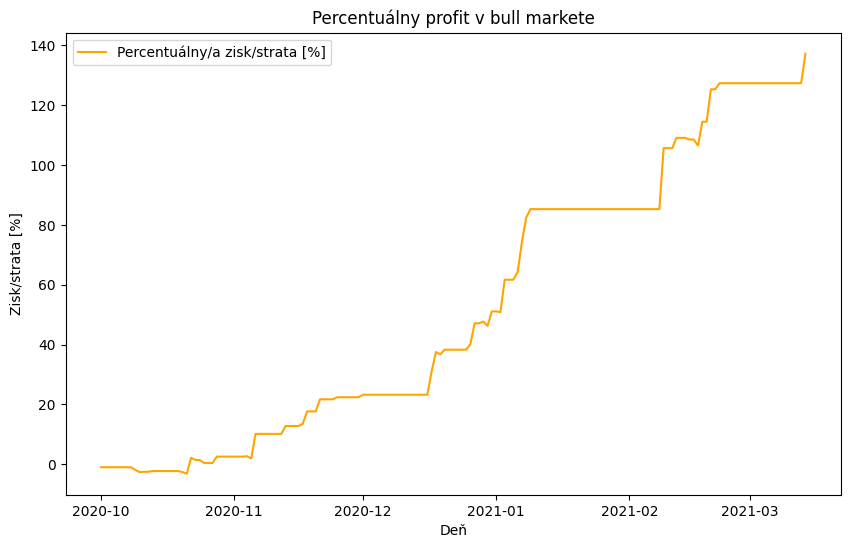

In [102]:
df_asc['profit_percentage'] = ((df_asc['balance'] - initial_balance) / initial_balance) * 100
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df_asc['date']), df_asc['profit_percentage'], color='orange')
plt.legend(['Percentuálny/a zisk/strata [%]'])
plt.xlabel('Deň')
plt.ylabel('Zisk/strata [%]')
plt.title('Percentuálny profit v bull markete')
plt.show()

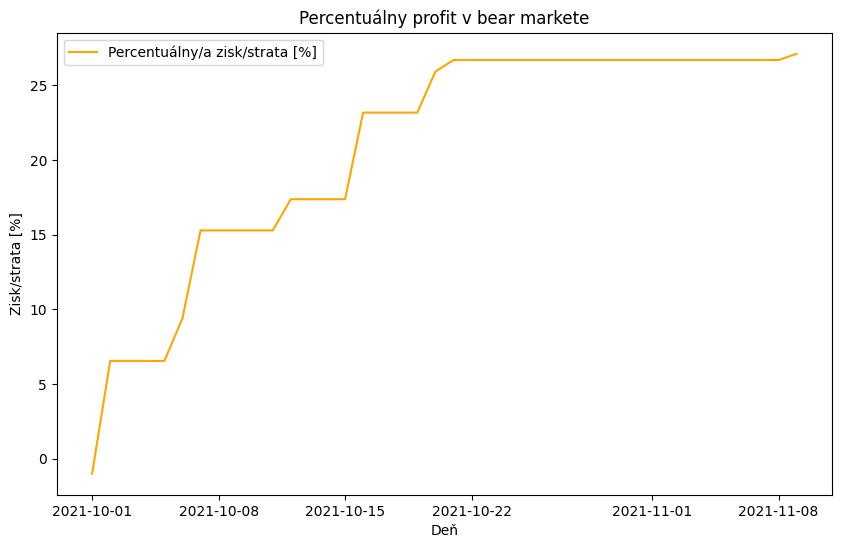

In [103]:
df_dsc['profit_percentage'] = ((df_dsc['balance'] - initial_balance) / initial_balance) * 100
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df_dsc['date']), df_dsc['profit_percentage'], color='orange')
plt.legend(['Percentuálny/a zisk/strata [%]'])
plt.xlabel('Deň')
plt.ylabel('Zisk/strata [%]')
plt.title('Percentuálny profit v bear markete')
plt.show()

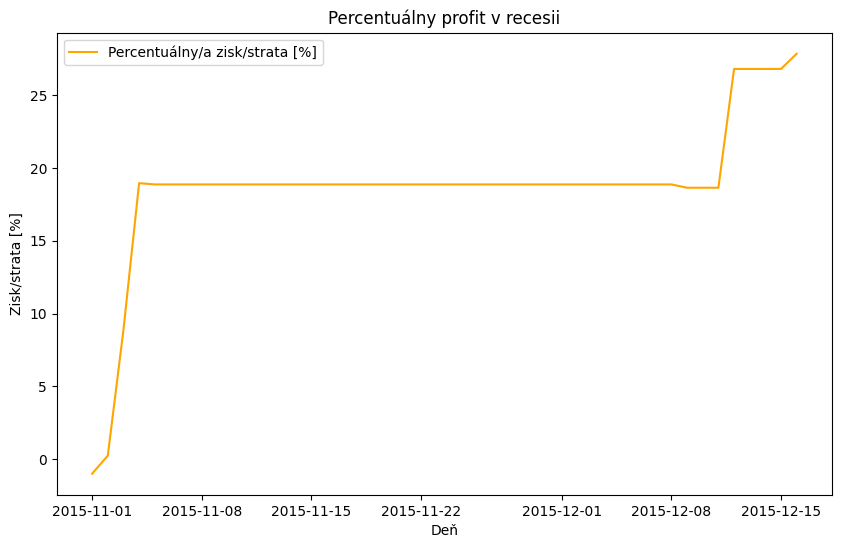

In [104]:
df_stg['profit_percentage'] = ((df_stg['balance'] - initial_balance) / initial_balance) * 100
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df_stg['date']), df_stg['profit_percentage'], color='orange')
plt.legend(['Percentuálny/a zisk/strata [%]'])
plt.xlabel('Deň')
plt.ylabel('Zisk/strata [%]')
plt.title('Percentuálny profit v recesii')
plt.show()

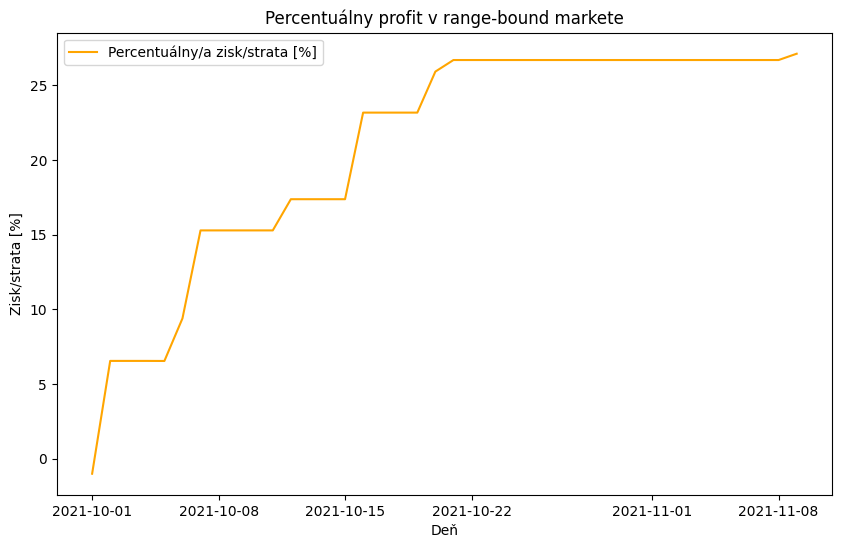

In [105]:
df_com['profit_percentage'] = ((df_com['balance'] - initial_balance) / initial_balance) * 100
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df_com['date']), df_com['profit_percentage'], color='orange')
plt.legend(['Percentuálny/a zisk/strata [%]'])
plt.xlabel('Deň')
plt.ylabel('Zisk/strata [%]')
plt.title('Percentuálny profit v range-bound markete')
plt.show()

In [106]:
profit = [len(df[df['profit_percentage'] > 0])]
loss = [len(df[df['profit_percentage'] < 0])]
print(f"Operations in profit: {profit}")
print(f"Operations in loss: {loss}")

Operations in profit: [219]
Operations in loss: [4]


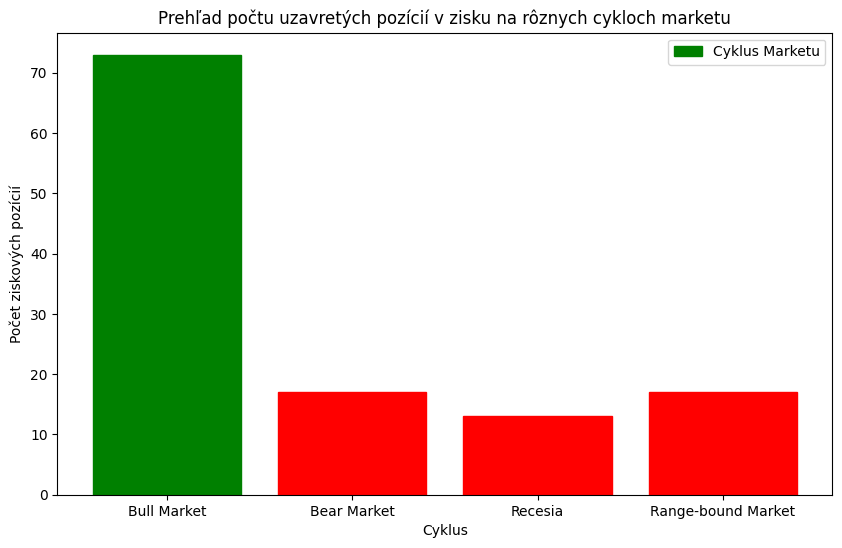

In [107]:
x_pos = ['Bull Market', 'Bear Market', 'Recesia', 'Range-bound Market']
y_pos = [len(df_asc[df_asc['profit_percentage'] > 0]), len(df_dsc[df_dsc['profit_percentage'] > 0]), len(df_stg[df_stg['profit_percentage'] > 0]), len(df_com[df_com['profit_percentage'] > 0])]
plt.figure(figsize=(10, 6))
max_count_index = y_pos.index(max(y_pos))
colors = ['red' if i != max_count_index else 'green' for i in range(len(x_pos))]

bars = plt.bar(x_pos,y_pos)

for i, bar in enumerate(bars):
    bar.set_color(colors[i])

plt.legend(['Cyklus Marketu'])
plt.title('Prehľad počtu uzavretých pozícií v zisku na rôznych cykloch marketu')
plt.xlabel('Cyklus')
plt.ylabel('Počet ziskových pozícií')

plt.show()

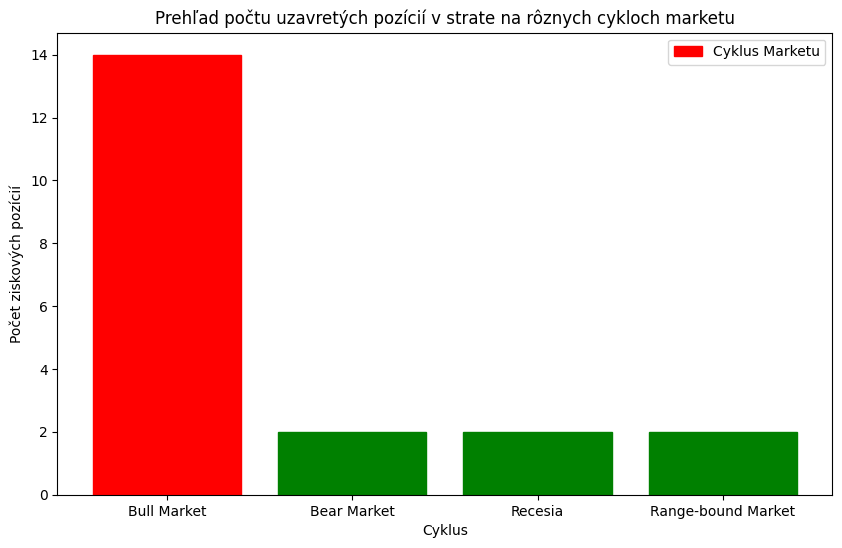

In [108]:
x_pos = ['Bull Market', 'Bear Market', 'Recesia', 'Range-bound Market']
y_pos = [len(df_asc[df_asc['profit_percentage'] < 0]), len(df_dsc[df_dsc['profit_percentage'] < 0]), len(df_stg[df_stg['profit_percentage'] < 0]), len(df_com[df_com['profit_percentage'] < 0])]
plt.figure(figsize=(10, 6))
max_count_index = y_pos.index(max(y_pos))
colors = ['green' if i != max_count_index else 'red' for i in range(len(x_pos))]

bars = plt.bar(x_pos,y_pos)

for i, bar in enumerate(bars):
    bar.set_color(colors[i])

plt.legend(['Cyklus Marketu'])
plt.title('Prehľad počtu uzavretých pozícií v strate na rôznych cykloch marketu')
plt.xlabel('Cyklus')
plt.ylabel('Počet ziskových pozícií')

plt.show()